# TP: Import, gestion et exploration de données météorologiques

Le but du TP est de comparer les températures de deux stations météo distante de 50 à 200 km
environ (par exemple Toulouse et Agen), ou séparée par des montagnes (Nancy et Strasbourg).
Le code devra être écrit pour qu’en changeant l’import des données son exécution fournisse tous les
résultats, avec les bons titres, légendes ...


## Pré-traitement
### P.1 Librairies

In [1]:
## Scientific libraries
##=====================

## Plot libraries
##===============

### P.2 Quelques codes

## I. Récupération des données
### I.1 Sur climascope

*Si vous n'avez pas accès à climascope, deux jeux de données sont fournis*

***Objectif*** Récupérer des données d'observations sur climascope

1. Aller sur le site [climascope](http://climascope.meteo.fr/)
2. Aller dans l'onglet "Suivi climatique"
3. Choisir le domaine
4. Choisir la variable
5. Choisir le pas de temps
6. Choisir "tableau pour une station"
7. Selectionnez la période de temps pour couvrir une saison
8. Vérifier le paramètre et le type de poste
9. Recherchez par nom la station qui vous interesse, puis selectionnez "Afficher le tableau"
10. Exportez le au format csv, en lui donnant un nom pertinent. (idée: Climascope_nom-de-variable_station_periode-de-temps.csv)

### I.2 Imports dans R
***Objectif*** Écrire une fonction capable d'importer les fichiers csv de climascope, et d'en faire un dataframe "propre". En particulier:

- Le dataframe doit être indéxé par les dates,
- Les dates doivent être au format standard "AAAA-MM-DD"
- Le temps va en ordre croissant avec les index,
- Les noms des colones doivent être compréhensible,
- La fonction `read.csv` permet de relire les fichiers csv, attention aux séparateurs et à la convention pour le séparateur décimal!

In [1]:
####################################
## Écrire votre réponse entre ici...

date_correction = function(t)
{
	return(base::paste( substr(t,1,4) , substr(t,5,6) , substr(t,7,8) , sep = "-" ))
}

load_climascope = function( ifile )
{
	## Load data
	data = read.csv( ifile , sep = ";" , row.names = 1 , dec = "," )
	
	## Remove last column (why exists ?????)
	data = data[,1:9]
	
	## Correct names
	colname = base::c( "TNq" , "Nor_TNq" , "Eca_TNq" , "Nor_TNq_mens" , "min_TNq_mens" , "date_min_TNq_mens" , "max_TNq_mens" , "date_max_TNq_mens" , "Rec_ref_period" )
	names(data) = colname
	
	## Correct temporal axes
	data = data[nrow(data):1,] ## Reverse order of time
	time = rownames(data)
	for( i in 1:length(time) )
	{
		time[i] = date_correction(time[i])
		data$date_min_TNq_mens[i] = date_correction(data$date_min_TNq_mens[i])
		data$date_max_TNq_mens[i] = date_correction(data$date_max_TNq_mens[i])
	}
	rownames(data) = time
	
	return(data)
}

#data_D = subset( data0 , format.Date( row.names(data0) , "%m" ) == "12" )
## ... et la
####################################

In [2]:
pathData = file.path( Sys.getenv("DATAFOLDER") , "Projets/Teaching/ENM/IENM1-S2" )
data0 = load_climascope( "data/Nancy_DJF_2018-2019.csv"      )
data1 = load_climascope( "data/Strasbourg_DJF_2018-2019.csv" )

## II. Exploration graphique

- Tracer les séries temporelles pour les deux stations sur un même graphe. Les données se suivent-elles ?
- Faire un résumé statistique des températures pour chaque station (moyenne, écart-type, médiane,quartile, quantile).
- Tracer les histogrammes des températures des deux stations sur un même graphe (utiliser de la transparence avec la commande `grDevices::rgb`).
- Tracer les boites à moustaches des températures pour les deux stations sur un diagramme commun avec la même échelle.


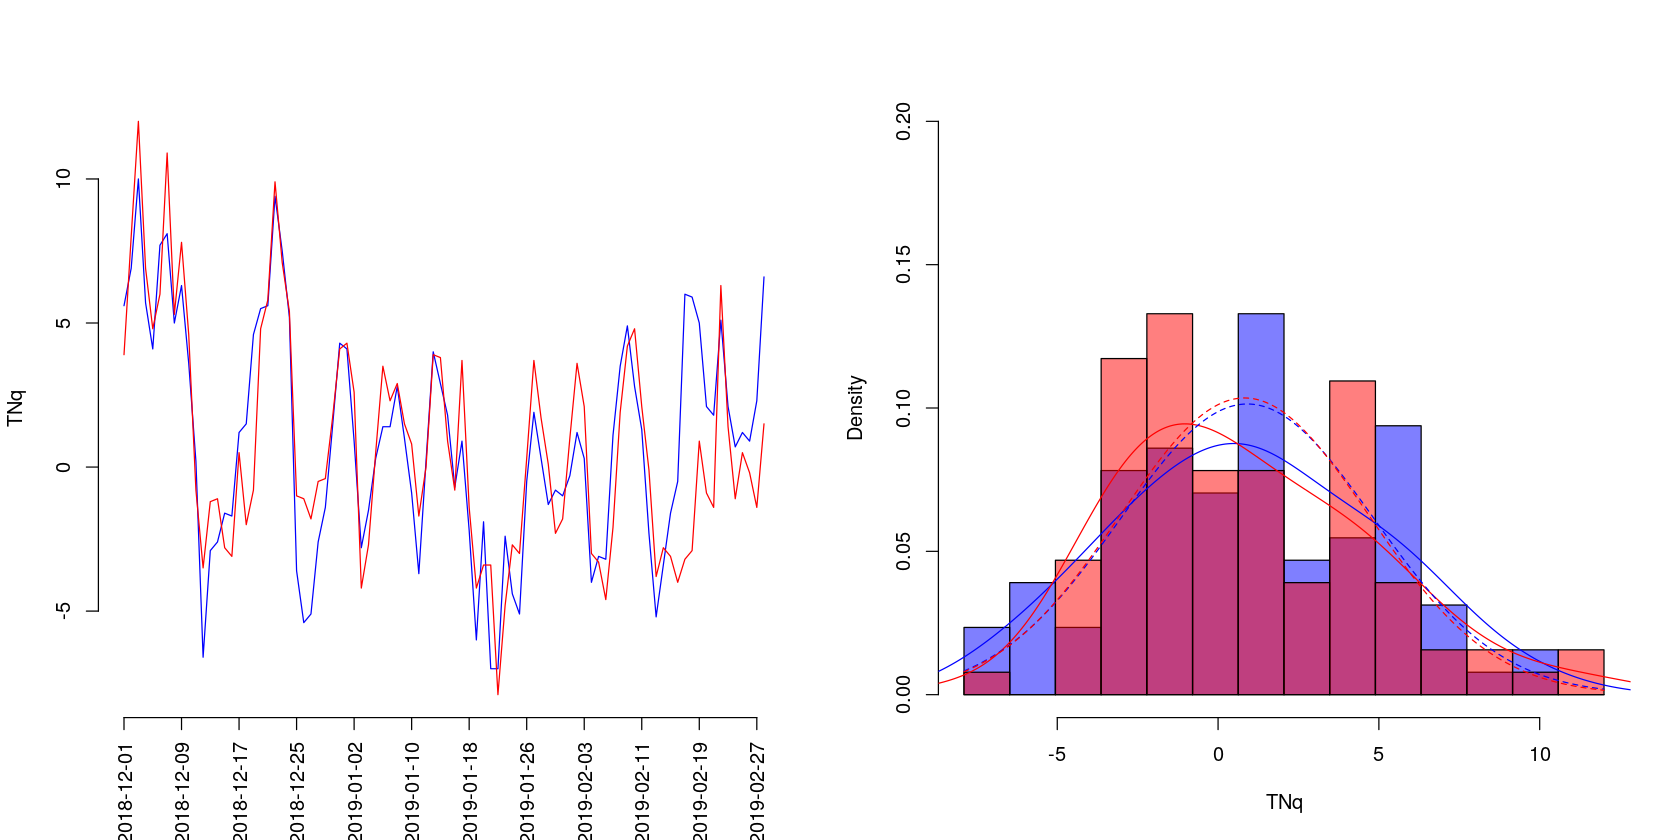

In [39]:
nrow = 1 ## Nombre de lignes de sous-graphique
ncol = 2 ## Nombre de colonnes de sous-graphique
base::options( repr.plot.width = 7 * ncol , repr.plot.height = 7 * nrow )
graphics::par( mfrow = base::c(nrow,ncol) ) ## On construit un graphique découpé en 2 sous fenêtre cote à cote

## Affichage de la série chrono
TNq_range = base::c( min(data0$TNq,data1$TNq) , max(data0$TNq,data1$TNq) )
plot(  data0$TNq , col = "blue" , type = "l" , ylim = TNq_range , ylab = "TNq" , axes = FALSE , xlab = "" )
lines( data1$TNq , col = "red" )
axis( 1 , at = seq( 1 , 90 , 8 ) , labels = rownames(data0)[seq( 1 , 90 , 8 )] , las = 2 )
axis(2)

x = base::seq( TNq_range[1] , TNq_range[2] , length = 15 )
ylim = base::c(0,0.2)
hist( data0$TNq , breaks = x , freq = FALSE , col = rgb(0,0,1,0.5) , ylim = ylim , xlab = "TNq" , main = "" )
hist( data1$TNq , breaks = x , freq = FALSE , col = rgb(1,0,0,0.5) , add = TRUE )
lines( density(data0$TNq,bw=2) , col = "blue" )
lines( density(data1$TNq,bw=2) , col = "red" )
x = base::seq( TNq_range[1] , TNq_range[2] , length = 200 )
lines( x , dnorm( x , mean = mean(data0$TNq) , sd = sd(data0$TNq) ) , col = "blue" , lty = 2 )
lines( x , dnorm( x , mean = mean(data1$TNq) , sd = sd(data1$TNq) ) , col = "red"  , lty = 2 )

## III. Tests statistiques

### V. Suppléments